In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, accuracy_score
from sklearn.impute import SimpleImputer, KNNImputer
from xgboost import XGBClassifier
import numpy as np


# Charger le jeu de données
df = pd.read_csv('dataset_test4.csv')

# Sélectionner les variables indépendantes et la variable cible
X = df.drop('MIS_Status', axis=1)
y = df['MIS_Status']



cat_vars = X.select_dtypes(include=['object']).columns.tolist() + ['UrbanRural'] + ['FranchiseBinary']
num_vars = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
num_vars.remove('UrbanRural') 
num_vars.remove('FranchiseBinary') 

# Créer les transformateurs pour les pipelines
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(missing_values=np.nan, strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(missing_values=np.nan, strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore', drop='if_binary')),
])

# Combiner les transformateurs dans un ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, num_vars),
        ('cat', categorical_transformer, cat_vars)
    ])

# Créer la pipeline de traitement et de modélisation
xgboost_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', XGBClassifier(random_state=42, n_jobs=-1, max_depth=15, min_child_weight=16))
])

# Séparer les données en ensembles d'entraînement et de test, stratifier sur y
X_train, X_test, y_train, y_test = train_test_split(
    X, y, shuffle=True, test_size=0.05, random_state=42, stratify=y)

# Ajuster la pipeline sur les données d'entraînement
xgboost_pipeline.fit(X_train, y_train)

#obtenir le nombre de caractéristiques transformées
feature_names = xgboost_pipeline.named_steps['preprocessor'].get_feature_names_out()
print(f"Nombre de caractéristiques après le prétraitement : {len(feature_names)}")

# Prédire les étiquettes sur l'ensemble de test
y_pred = xgboost_pipeline.predict(X_test)

# Évaluer le modèle
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(accuracy)
print(report)


Nombre de caractéristiques après le prétraitement : 137
0.946416007654856
              precision    recall  f1-score   support

           0       0.96      0.97      0.97     27660
           1       0.89      0.87      0.88      7873

    accuracy                           0.95     35533
   macro avg       0.93      0.92      0.92     35533
weighted avg       0.95      0.95      0.95     35533



In [5]:
cat_vars, num_vars

(['State',
  'BankState',
  'RevLineCr',
  'LowDoc',
  'Industry',
  'UrbanRural',
  'FranchiseBinary'],
 ['Zip', 'NAICS', 'Term', 'NoEmp', 'FranchiseCode'])

In [6]:
new_data = pd.DataFrame({
    'State': ['NH', 'CA', 'NJ'],  
    'BankState': ['NH', 'CA', 'NJ'],  
    'RevLineCr': ['Y', 'N', 'N'],
    'LowDoc': ['Y', 'N', 'N'], 
    'UrbanRural': [0, 1, 0],
    'FranchiseBinary': [0, 1, 0],
    'Zip': [47711, 47711, 0],
    'NAICS': [451120, 451120, 0],
    'Term': [84, 240, 45],
    'NoEmp': [2, 5, 10],
    'FranchiseCode': [0, 1, 0],
    'Industry': ['Retail_trade', 'Retail_trade', 'Arts/Entertain/Rec'],
})

# faire des prédictions avec le modèle optimisé
new_y_ped = xgboost_pipeline.predict(new_data)

# ajouter les prédictions à new_data
new_data['1->NO  0->YES'] = new_y_ped

print(new_data)

  State BankState RevLineCr LowDoc  UrbanRural  FranchiseBinary    Zip  \
0    NH        NH         Y      Y           0                0  47711   
1    CA        CA         N      N           1                1  47711   
2    NJ        NJ         N      N           0                0      0   

    NAICS  Term  NoEmp  FranchiseCode            Industry  1->NO  0->YES  
0  451120    84      2              0        Retail_trade              0  
1  451120   240      5              1        Retail_trade              0  
2       0    45     10              0  Arts/Entertain/Rec              1  


In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
import numpy as np

# Charger le jeu de données

df = pd.read_csv('dataset_test1.csv')

# Sélectionner les variables indépendantes et la variable cible
X = df.drop('MIS_Status', axis=1)
y = df['MIS_Status']


cat_vars = X.select_dtypes(include=['object']).columns.tolist() + ['NewExist'] + ['UrbanRural'] + ['FranchiseBinary'] 
num_vars = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
num_vars.remove('NewExist')  
num_vars.remove('UrbanRural') 
num_vars.remove('FranchiseBinary') 

# Créer les transformateurs pour les pipelines
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(missing_values=np.nan, strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(missing_values=np.nan, strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore', drop='if_binary'))
])

# Combiner les transformateurs dans un ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, num_vars),
        ('cat', categorical_transformer, cat_vars)
    ])

# Créer la pipeline de traitement et de modélisation
rf_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42, n_jobs=-1))
])

# Séparer les données en ensembles d'entraînement et de test, stratifier sur y
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)


rf_pipeline.fit(X_train, y_train)

#obtenir le nombre de caractéristiques transformées
feature_names = rf_pipeline.named_steps['preprocessor'].get_feature_names_out()
print(f"Nombre de caractéristiques après le prétraitement : {len(feature_names)}")

# Prédire les étiquettes sur l'ensemble de test
y_pred = rf_pipeline.predict(X_test)

# Évaluer le modèle
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(accuracy, report)


Nombre de caractéristiques après le prétraitement : 142
0.9352287678268639               precision    recall  f1-score   support

           0       0.94      0.98      0.96    110637
           1       0.91      0.78      0.84     31494

    accuracy                           0.94    142131
   macro avg       0.93      0.88      0.90    142131
weighted avg       0.93      0.94      0.93    142131



In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, accuracy_score
from sklearn.impute import SimpleImputer, KNNImputer
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
import numpy as np
# Charger le jeu de données
df = pd.read_csv('dataset_test1.csv')

# Sélectionner les variables indépendantes et la variable cible
X = df.drop('MIS_Status', axis=1)
y = df['MIS_Status']


cat_vars = X.select_dtypes(include=['object']).columns.tolist() + ['NewExist'] + ['UrbanRural'] + ['FranchiseBinary']
num_vars = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
num_vars.remove('NewExist')  
num_vars.remove('UrbanRural') 
num_vars.remove('FranchiseBinary') 


# Créer les transformateurs pour les pipelines
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(missing_values=np.nan, strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(missing_values=np.nan, strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore', drop='if_binary')),
])



# Combiner les transformateurs dans un ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, num_vars),
        ('cat', categorical_transformer, cat_vars),
    ])

# Créer la pipeline de traitement et de modélisation
xgboost_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', CatBoostClassifier(max_depth=10, random_state=42))
])
#CatBoostClassifier(max_depth=10, random_state=42)
#XGBClassifier(n_estimators = 100, random_state=42, n_jobs=-1,max_depth=16, min_child_weight=14)

# Séparer les données en ensembles d'entraînement et de test, stratifier sur y
X_train, X_test, y_train, y_test = train_test_split(
    X, y, shuffle=True, test_size=0.05, random_state=42, stratify=y)

# Ajuster la pipeline sur les données d'entraînement
xgboost_pipeline.fit(X_train, y_train)

#obtenir le nombre de caractéristiques transformées
feature_names = xgboost_pipeline.named_steps['preprocessor'].get_feature_names_out()
print(f"Nombre de caractéristiques après le prétraitement : {len(feature_names)}")

# Prédire les étiquettes sur l'ensemble de test
y_pred = xgboost_pipeline.predict(X_test)

# Évaluer le modèle
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(accuracy)
print(report)


Learning rate set to 0.166372
0:	learn: 0.5075830	total: 79.1ms	remaining: 1m 19s
1:	learn: 0.4212376	total: 151ms	remaining: 1m 15s
2:	learn: 0.3584947	total: 234ms	remaining: 1m 17s
3:	learn: 0.3237087	total: 303ms	remaining: 1m 15s
4:	learn: 0.2991704	total: 377ms	remaining: 1m 14s
5:	learn: 0.2793830	total: 449ms	remaining: 1m 14s
6:	learn: 0.2576581	total: 530ms	remaining: 1m 15s
7:	learn: 0.2483953	total: 600ms	remaining: 1m 14s
8:	learn: 0.2358834	total: 684ms	remaining: 1m 15s
9:	learn: 0.2274281	total: 764ms	remaining: 1m 15s
10:	learn: 0.2197238	total: 841ms	remaining: 1m 15s
11:	learn: 0.2152261	total: 910ms	remaining: 1m 14s
12:	learn: 0.2115737	total: 994ms	remaining: 1m 15s
13:	learn: 0.2076571	total: 1.07s	remaining: 1m 15s
14:	learn: 0.2055161	total: 1.15s	remaining: 1m 15s
15:	learn: 0.2028252	total: 1.23s	remaining: 1m 15s
16:	learn: 0.2002109	total: 1.31s	remaining: 1m 15s
17:	learn: 0.1959235	total: 1.38s	remaining: 1m 15s
18:	learn: 0.1925264	total: 1.46s	remaining

In [4]:
# Obtenir les importances des caractéristiques du modèle XGBoost
feature_importances = xgboost_pipeline.named_steps['classifier'].feature_importances_

# Obtenir les noms des caractéristiques transformées
feature_names = xgboost_pipeline.named_steps['preprocessor'].get_feature_names_out()

# Créer un DataFrame pour visualiser les importances
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Afficher les importances des caractéristiques
print(importance_df)

                        Feature  Importance
2                     num__Term   36.563356
1                    num__NAICS   11.283051
133  cat__Industry_Retail_trade    9.043598
8                 num__SBA_Appv    4.557717
115            cat__RevLineCr_Y    3.505415
..                          ...         ...
131  cat__Industry_Public_Admin    0.000541
109           cat__BankState_VI    0.000000
72            cat__BankState_GU    0.000000
127     cat__Industry_Mgmt_comp    0.000000
62            cat__BankState_AN    0.000000

[142 rows x 2 columns]


In [5]:
import pickle
with open('best_model.pkl', 'wb') as fichier:
    pickle.dump(xgboost_pipeline, fichier)

In [6]:
with open('best_model.pkl', 'rb') as fichier:
        modele_charge = pickle.load(fichier)

In [7]:
cat_vars, num_vars

(['State',
  'BankState',
  'RevLineCr',
  'LowDoc',
  'Industry',
  'NewExist',
  'UrbanRural',
  'FranchiseBinary'],
 ['Zip',
  'NAICS',
  'Term',
  'NoEmp',
  'CreateJob',
  'RetainedJob',
  'FranchiseCode',
  'GrAppv',
  'SBA_Appv'])

In [8]:
new_data = pd.DataFrame({
    'State': ['NH', 'CA', 'NJ'],  
    'BankState': ['NH', 'CA', 'NJ'],  
    'RevLineCr': ['Y', 'N', 'N'],
    'LowDoc': ['Y', 'N', 'N'],
    'NewExist': [1,2,2],  
    'UrbanRural': [0, 1, 0],
    'FranchiseBinary': [0, 1, 0],
    'Zip': [47711, 47711, 0],
    'NAICS': [451120, 451120, 7083],
    'Term': [84, 240, 45],
    'NoEmp': [2, 5, 45],
    'CreateJob': [0,7, 0],
    'RetainedJob': [0, 1, 0],
    'FranchiseCode': [0, 1, 0],
    'GrAppv': [60000.0, 287000.0, 600000.0],
    'SBA_Appv': [32000.0, 215250.0, 499998.0],
    'Industry': ['Retail_trade', 'Retail_trade', 'Arts/Entertain/Rec'],
})

# faire des prédictions avec le modèle optimisé
new_y_ped = xgboost_pipeline.predict(new_data)

# ajouter les prédictions à new_data
new_data['1->NO  0->YES'] = new_y_ped

print(new_data)

  State BankState RevLineCr LowDoc  NewExist  UrbanRural  FranchiseBinary  \
0    NH        NH         Y      Y         1           0                0   
1    CA        CA         N      N         2           1                1   
2    NJ        NJ         N      N         2           0                0   

     Zip   NAICS  Term  NoEmp  CreateJob  RetainedJob  FranchiseCode  \
0  47711  451120    84      2          0            0              0   
1  47711  451120   240      5          7            1              1   
2      0    7083    45     45          0            0              0   

     GrAppv  SBA_Appv            Industry  1->NO  0->YES  
0   60000.0   32000.0        Retail_trade              0  
1  287000.0  215250.0        Retail_trade              0  
2  600000.0  499998.0  Arts/Entertain/Rec              1  


In [9]:
from sklearn.model_selection import cross_val_predict

y_train_pred_xgb = cross_val_predict(xgboost_pipeline, X_train, y_train)

Learning rate set to 0.151251
0:	learn: 0.5291920	total: 71.9ms	remaining: 1m 11s
1:	learn: 0.4436555	total: 133ms	remaining: 1m 6s
2:	learn: 0.3740530	total: 216ms	remaining: 1m 11s
3:	learn: 0.3391441	total: 280ms	remaining: 1m 9s
4:	learn: 0.3085494	total: 348ms	remaining: 1m 9s
5:	learn: 0.2880918	total: 413ms	remaining: 1m 8s
6:	learn: 0.2723181	total: 476ms	remaining: 1m 7s
7:	learn: 0.2611065	total: 541ms	remaining: 1m 7s
8:	learn: 0.2529182	total: 600ms	remaining: 1m 6s
9:	learn: 0.2396972	total: 676ms	remaining: 1m 6s
10:	learn: 0.2344965	total: 731ms	remaining: 1m 5s
11:	learn: 0.2246207	total: 797ms	remaining: 1m 5s
12:	learn: 0.2183558	total: 864ms	remaining: 1m 5s
13:	learn: 0.2154758	total: 931ms	remaining: 1m 5s
14:	learn: 0.2125212	total: 999ms	remaining: 1m 5s
15:	learn: 0.2095625	total: 1.06s	remaining: 1m 5s
16:	learn: 0.2066143	total: 1.13s	remaining: 1m 5s
17:	learn: 0.2026688	total: 1.2s	remaining: 1m 5s
18:	learn: 0.1988315	total: 1.26s	remaining: 1m 5s
19:	learn

c:\Users\socci\Desktop\brief_classif_sba\venv\lib\site-packages\sklearn\preprocessing\_encoders.py:241: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


Learning rate set to 0.151251
0:	learn: 0.5291838	total: 68.8ms	remaining: 1m 8s
1:	learn: 0.4435147	total: 131ms	remaining: 1m 5s
2:	learn: 0.3715656	total: 208ms	remaining: 1m 9s
3:	learn: 0.3316992	total: 274ms	remaining: 1m 8s
4:	learn: 0.2981546	total: 340ms	remaining: 1m 7s
5:	learn: 0.2799563	total: 411ms	remaining: 1m 8s
6:	learn: 0.2671226	total: 476ms	remaining: 1m 7s
7:	learn: 0.2559011	total: 537ms	remaining: 1m 6s
8:	learn: 0.2461589	total: 606ms	remaining: 1m 6s
9:	learn: 0.2359807	total: 675ms	remaining: 1m 6s
10:	learn: 0.2293215	total: 742ms	remaining: 1m 6s
11:	learn: 0.2244872	total: 806ms	remaining: 1m 6s
12:	learn: 0.2184968	total: 871ms	remaining: 1m 6s
13:	learn: 0.2138635	total: 937ms	remaining: 1m 5s
14:	learn: 0.2090961	total: 1s	remaining: 1m 5s
15:	learn: 0.2054699	total: 1.07s	remaining: 1m 5s
16:	learn: 0.2024348	total: 1.13s	remaining: 1m 5s
17:	learn: 0.1998152	total: 1.2s	remaining: 1m 5s
18:	learn: 0.1959273	total: 1.27s	remaining: 1m 5s
19:	learn: 0.1

c:\Users\socci\Desktop\brief_classif_sba\venv\lib\site-packages\sklearn\preprocessing\_encoders.py:241: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


Learning rate set to 0.151251
0:	learn: 0.5211952	total: 70.9ms	remaining: 1m 10s
1:	learn: 0.4329987	total: 135ms	remaining: 1m 7s
2:	learn: 0.3708530	total: 206ms	remaining: 1m 8s
3:	learn: 0.3366291	total: 272ms	remaining: 1m 7s
4:	learn: 0.3106563	total: 332ms	remaining: 1m 6s
5:	learn: 0.2811751	total: 401ms	remaining: 1m 6s
6:	learn: 0.2680254	total: 470ms	remaining: 1m 6s
7:	learn: 0.2589834	total: 536ms	remaining: 1m 6s
8:	learn: 0.2478398	total: 604ms	remaining: 1m 6s
9:	learn: 0.2365226	total: 674ms	remaining: 1m 6s
10:	learn: 0.2273509	total: 739ms	remaining: 1m 6s
11:	learn: 0.2215624	total: 806ms	remaining: 1m 6s
12:	learn: 0.2171144	total: 863ms	remaining: 1m 5s
13:	learn: 0.2124047	total: 932ms	remaining: 1m 5s
14:	learn: 0.2084706	total: 1000ms	remaining: 1m 5s
15:	learn: 0.2049966	total: 1.06s	remaining: 1m 4s
16:	learn: 0.2025028	total: 1.12s	remaining: 1m 4s
17:	learn: 0.2001151	total: 1.18s	remaining: 1m 4s
18:	learn: 0.1975707	total: 1.25s	remaining: 1m 4s
19:	lear

array([[511322,  14202],
       [ 17258, 132336]], dtype=int64)

Predicted PIF (0)  Predicted CHGOFF (1)
Actual PIF (0)                511322                 14202
Actual CHGOFF (1)              17258                132336

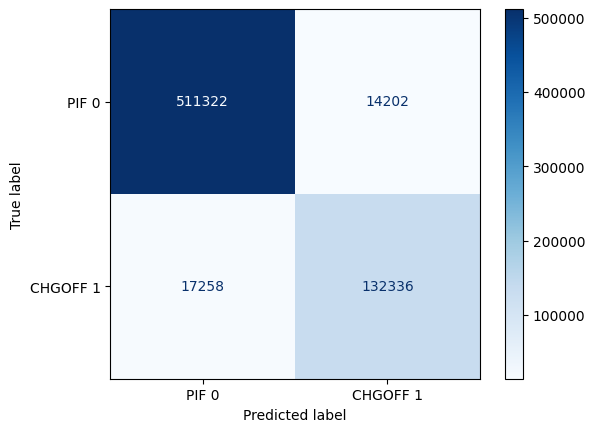

In [15]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

# On crée la matrice de confusion en passant les classes et les prédictions du modèle, puis on l'affiche
cm = confusion_matrix(y_train, y_train_pred_xgb)
display(cm)

# Affichage avec un DataFrame
conf_matrix = pd.DataFrame(cm, index=["Actual PIF (0)", "Actual CHGOFF (1)"], columns=["Predicted PIF (0)", "Predicted CHGOFF (1)"])
display(conf_matrix)

# Affichage avec un plot
graph_cm = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["PIF 0", "CHGOFF 1"])
graph_cm.plot(cmap="Blues")

In [16]:
from sklearn.metrics import classification_report

print(classification_report(y_train, y_train_pred_xgb))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97    525524
           1       0.90      0.88      0.89    149594

    accuracy                           0.95    675118
   macro avg       0.94      0.93      0.93    675118
weighted avg       0.95      0.95      0.95    675118



In [17]:
from sklearn.metrics import precision_recall_curve
from sklearn.model_selection import cross_val_predict
# Au lieu d'obtenir les prédictions, on récupere les scores de probabilités pour chaque observations
y_probas_xgb = cross_val_predict(xgboost_pipeline, X_train, y_train, method="predict_proba")
display(y_probas_xgb)

# On récupere uniquement les probabilités pour la classe positive
y_scores_xgb = y_probas_xgb[:, 1]

# A partir des probabilités on calcule les combinaisons de scores pour recall et precision en fonction du seuil
precisions_xgb, recalls_xgb, thresholds_xgb = precision_recall_curve(y_train, y_scores_xgb)

Learning rate set to 0.151251
0:	learn: 0.5196097	total: 95.2ms	remaining: 1m 35s
1:	learn: 0.4188251	total: 180ms	remaining: 1m 29s
2:	learn: 0.3605578	total: 259ms	remaining: 1m 26s
3:	learn: 0.3257823	total: 343ms	remaining: 1m 25s
4:	learn: 0.2908576	total: 420ms	remaining: 1m 23s
5:	learn: 0.2707195	total: 496ms	remaining: 1m 22s
6:	learn: 0.2594935	total: 561ms	remaining: 1m 19s
7:	learn: 0.2451179	total: 644ms	remaining: 1m 19s
8:	learn: 0.2376497	total: 722ms	remaining: 1m 19s
9:	learn: 0.2278693	total: 800ms	remaining: 1m 19s
10:	learn: 0.2213123	total: 881ms	remaining: 1m 19s
11:	learn: 0.2135787	total: 961ms	remaining: 1m 19s
12:	learn: 0.2097565	total: 1.03s	remaining: 1m 18s
13:	learn: 0.2063483	total: 1.1s	remaining: 1m 17s
14:	learn: 0.2012538	total: 1.18s	remaining: 1m 17s
15:	learn: 0.1985769	total: 1.26s	remaining: 1m 17s
16:	learn: 0.1960950	total: 1.34s	remaining: 1m 17s
17:	learn: 0.1933879	total: 1.43s	remaining: 1m 18s
18:	learn: 0.1916137	total: 1.51s	remaining:

c:\Users\socci\Desktop\brief_classif_sba\venv\lib\site-packages\sklearn\preprocessing\_encoders.py:241: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


Learning rate set to 0.151251
0:	learn: 0.5181104	total: 84.2ms	remaining: 1m 24s
1:	learn: 0.4239777	total: 164ms	remaining: 1m 22s
2:	learn: 0.3655656	total: 244ms	remaining: 1m 20s
3:	learn: 0.3257349	total: 327ms	remaining: 1m 21s
4:	learn: 0.3013398	total: 399ms	remaining: 1m 19s
5:	learn: 0.2713726	total: 477ms	remaining: 1m 18s
6:	learn: 0.2529532	total: 559ms	remaining: 1m 19s
7:	learn: 0.2445079	total: 642ms	remaining: 1m 19s
8:	learn: 0.2369032	total: 732ms	remaining: 1m 20s
9:	learn: 0.2272147	total: 829ms	remaining: 1m 22s
10:	learn: 0.2218179	total: 912ms	remaining: 1m 22s
11:	learn: 0.2136043	total: 1s	remaining: 1m 22s
12:	learn: 0.2098667	total: 1.08s	remaining: 1m 22s
13:	learn: 0.2063865	total: 1.16s	remaining: 1m 21s
14:	learn: 0.2027277	total: 1.24s	remaining: 1m 21s
15:	learn: 0.1990422	total: 1.33s	remaining: 1m 21s
16:	learn: 0.1958589	total: 1.41s	remaining: 1m 21s
17:	learn: 0.1932438	total: 1.49s	remaining: 1m 21s
18:	learn: 0.1914302	total: 1.57s	remaining: 1

c:\Users\socci\Desktop\brief_classif_sba\venv\lib\site-packages\sklearn\preprocessing\_encoders.py:241: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


Learning rate set to 0.151251
0:	learn: 0.5207572	total: 84.8ms	remaining: 1m 24s
1:	learn: 0.4249957	total: 162ms	remaining: 1m 20s
2:	learn: 0.3537071	total: 255ms	remaining: 1m 24s
3:	learn: 0.3178980	total: 336ms	remaining: 1m 23s
4:	learn: 0.2893264	total: 421ms	remaining: 1m 23s
5:	learn: 0.2710108	total: 498ms	remaining: 1m 22s
6:	learn: 0.2548958	total: 580ms	remaining: 1m 22s
7:	learn: 0.2434428	total: 662ms	remaining: 1m 22s
8:	learn: 0.2348977	total: 743ms	remaining: 1m 21s
9:	learn: 0.2254885	total: 830ms	remaining: 1m 22s
10:	learn: 0.2198837	total: 913ms	remaining: 1m 22s
11:	learn: 0.2147514	total: 1.02s	remaining: 1m 23s
12:	learn: 0.2086632	total: 1.11s	remaining: 1m 24s
13:	learn: 0.2054162	total: 1.2s	remaining: 1m 24s
14:	learn: 0.2020931	total: 1.29s	remaining: 1m 24s
15:	learn: 0.1985931	total: 1.39s	remaining: 1m 25s
16:	learn: 0.1962139	total: 1.48s	remaining: 1m 25s
17:	learn: 0.1932958	total: 1.58s	remaining: 1m 26s
18:	learn: 0.1914027	total: 1.68s	remaining:

array([[9.99333310e-01, 6.66689791e-04],
       [9.60624331e-01, 3.93756692e-02],
       [9.99975607e-01, 2.43933224e-05],
       ...,
       [9.99364298e-01, 6.35702399e-04],
       [4.69805364e-03, 9.95301946e-01],
       [9.57966494e-01, 4.20335061e-02]])

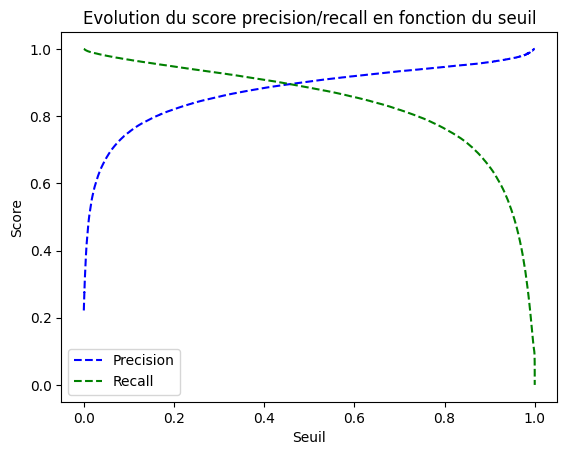

In [18]:
import matplotlib.pyplot as plt

plt.plot(thresholds_xgb, precisions_xgb[:-1], "b--", label="Precision")
plt.plot(thresholds_xgb, recalls_xgb[:-1], "g--", label="Recall")
plt.title("Evolution du score precision/recall en fonction du seuil")
plt.xlabel("Seuil")
plt.ylabel("Score")
plt.legend()
plt.show()

In [19]:
from sklearn.metrics import roc_curve

# La fonction roc_curve retourne le FPR, TPR et les seuils 
fpr_xgb, tpr_xgb, tresholds_xgb = roc_curve(y_train, y_scores_xgb)

In [20]:
# Fonction pour représenter la courbe ROC
def plot_roc_curve(fpr, tpr, label=None):

    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], "k--")
    plt.title("Courbe ROC")
    plt.xlabel("Taux de Faux Positif")
    plt.ylabel("Taux de Vrai Positif")
    plt.grid()

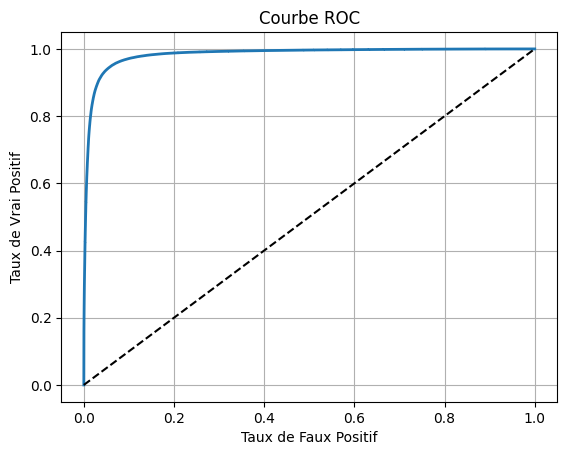

In [21]:
plot_roc_curve(fpr_xgb, tpr_xgb)
plt.show()

In [22]:
from sklearn.metrics import roc_auc_score

display(roc_auc_score(y_train, y_scores_xgb))

0.9837729800223602

c:\Users\socci\Desktop\brief_classif_sba\venv\lib\site-packages\sklearn\preprocessing\_encoders.py:241: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
c:\Users\socci\Desktop\brief_classif_sba\venv\lib\site-packages\sklearn\preprocessing\_encoders.py:241: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


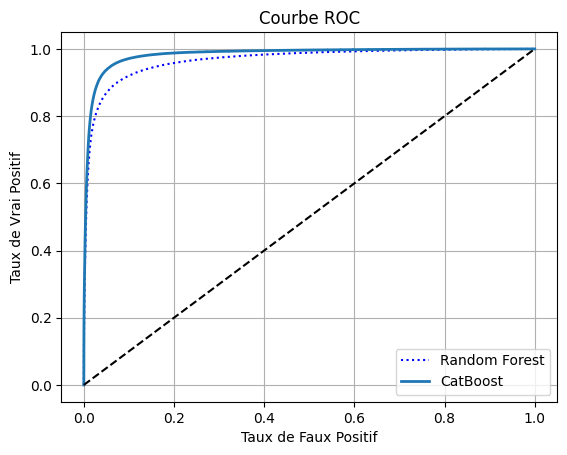

AUC modèle XGBOOST 0.9837729800223602
AUC modèle Random Forest 0.9670631530428615


In [23]:
# On récupere les scores pour le modèle random forest
y_probas_rf = cross_val_predict(rf_pipeline, X_train, y_train, method="predict_proba")
y_scores_rf = y_probas_rf[:, 1]

# On calcule le TPR et FPR pour le modèle random forest
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_train, y_scores_rf)

# On représente graphiquement les deux modèles
plt.plot(fpr_rf, tpr_rf, "b:", label="Random Forest")
plot_roc_curve(fpr_xgb, tpr_xgb, "CatBoost")
plt.legend(loc="lower right")
plt.show()

print("AUC modèle XGBOOST", roc_auc_score(y_train, y_scores_xgb))
print("AUC modèle Random Forest", roc_auc_score(y_train, y_scores_rf))

Learning rate set to 0.056584
0:	learn: 0.6301250	total: 24.1ms	remaining: 24.1s
1:	learn: 0.5784383	total: 48.3ms	remaining: 24.1s
2:	learn: 0.5357262	total: 72.1ms	remaining: 24s
3:	learn: 0.4961950	total: 96.4ms	remaining: 24s
4:	learn: 0.4630009	total: 121ms	remaining: 24.2s
5:	learn: 0.4384890	total: 146ms	remaining: 24.2s
6:	learn: 0.4129395	total: 174ms	remaining: 24.7s
7:	learn: 0.3903696	total: 201ms	remaining: 25s
8:	learn: 0.3746323	total: 230ms	remaining: 25.3s
9:	learn: 0.3613049	total: 257ms	remaining: 25.4s
10:	learn: 0.3448461	total: 283ms	remaining: 25.5s
11:	learn: 0.3331893	total: 309ms	remaining: 25.5s
12:	learn: 0.3232763	total: 335ms	remaining: 25.4s
13:	learn: 0.3153685	total: 360ms	remaining: 25.3s
14:	learn: 0.3079078	total: 383ms	remaining: 25.2s
15:	learn: 0.3003895	total: 406ms	remaining: 24.9s
16:	learn: 0.2950679	total: 429ms	remaining: 24.8s
17:	learn: 0.2898584	total: 452ms	remaining: 24.7s
18:	learn: 0.2853160	total: 473ms	remaining: 24.4s
19:	learn: 0.

c:\Users\socci\Desktop\brief_classif_sba\venv\lib\site-packages\sklearn\preprocessing\_encoders.py:241: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


Learning rate set to 0.076074
0:	learn: 0.6077486	total: 29.6ms	remaining: 29.6s
1:	learn: 0.5376553	total: 58.6ms	remaining: 29.2s
2:	learn: 0.4855321	total: 86.2ms	remaining: 28.7s
3:	learn: 0.4465285	total: 113ms	remaining: 28.2s
4:	learn: 0.4170338	total: 139ms	remaining: 27.7s
5:	learn: 0.3885388	total: 166ms	remaining: 27.6s
6:	learn: 0.3642992	total: 197ms	remaining: 27.9s
7:	learn: 0.3425352	total: 228ms	remaining: 28.3s
8:	learn: 0.3305067	total: 253ms	remaining: 27.8s
9:	learn: 0.3195740	total: 275ms	remaining: 27.2s
10:	learn: 0.3072588	total: 301ms	remaining: 27.1s
11:	learn: 0.2978337	total: 328ms	remaining: 27s
12:	learn: 0.2882439	total: 357ms	remaining: 27.1s
13:	learn: 0.2789301	total: 383ms	remaining: 27s
14:	learn: 0.2707682	total: 410ms	remaining: 26.9s
15:	learn: 0.2646404	total: 440ms	remaining: 27s
16:	learn: 0.2593780	total: 467ms	remaining: 27s
17:	learn: 0.2545671	total: 495ms	remaining: 27s
18:	learn: 0.2489588	total: 522ms	remaining: 26.9s
19:	learn: 0.24573

c:\Users\socci\Desktop\brief_classif_sba\venv\lib\site-packages\sklearn\preprocessing\_encoders.py:241: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


Learning rate set to 0.090454
0:	learn: 0.5922425	total: 34.7ms	remaining: 34.6s
1:	learn: 0.5134787	total: 67.6ms	remaining: 33.8s
2:	learn: 0.4576254	total: 97.7ms	remaining: 32.5s
3:	learn: 0.4143859	total: 128ms	remaining: 31.8s
4:	learn: 0.3805251	total: 158ms	remaining: 31.4s
5:	learn: 0.3519679	total: 189ms	remaining: 31.2s
6:	learn: 0.3352431	total: 223ms	remaining: 31.6s
7:	learn: 0.3210251	total: 263ms	remaining: 32.7s
8:	learn: 0.3078017	total: 299ms	remaining: 32.9s
9:	learn: 0.2928961	total: 332ms	remaining: 32.9s
10:	learn: 0.2807863	total: 365ms	remaining: 32.8s
11:	learn: 0.2727837	total: 398ms	remaining: 32.8s
12:	learn: 0.2656803	total: 432ms	remaining: 32.8s
13:	learn: 0.2588294	total: 467ms	remaining: 32.9s
14:	learn: 0.2527260	total: 502ms	remaining: 33s
15:	learn: 0.2478628	total: 535ms	remaining: 32.9s
16:	learn: 0.2434079	total: 567ms	remaining: 32.8s
17:	learn: 0.2393531	total: 600ms	remaining: 32.7s
18:	learn: 0.2366754	total: 639ms	remaining: 33s
19:	learn: 0

c:\Users\socci\Desktop\brief_classif_sba\venv\lib\site-packages\sklearn\preprocessing\_encoders.py:241: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


Learning rate set to 0.102277
0:	learn: 0.5722635	total: 39.5ms	remaining: 39.5s
1:	learn: 0.4896193	total: 76.7ms	remaining: 38.3s
2:	learn: 0.4327702	total: 111ms	remaining: 37s
3:	learn: 0.3901963	total: 146ms	remaining: 36.4s
4:	learn: 0.3553478	total: 181ms	remaining: 36s
5:	learn: 0.3347840	total: 220ms	remaining: 36.4s
6:	learn: 0.3171094	total: 254ms	remaining: 36s
7:	learn: 0.3020620	total: 283ms	remaining: 35.1s
8:	learn: 0.2903813	total: 317ms	remaining: 34.9s
9:	learn: 0.2816076	total: 352ms	remaining: 34.8s
10:	learn: 0.2722072	total: 388ms	remaining: 34.8s
11:	learn: 0.2616755	total: 426ms	remaining: 35.1s
12:	learn: 0.2563644	total: 462ms	remaining: 35.1s
13:	learn: 0.2492278	total: 498ms	remaining: 35.1s
14:	learn: 0.2404421	total: 535ms	remaining: 35.1s
15:	learn: 0.2347811	total: 572ms	remaining: 35.2s
16:	learn: 0.2313897	total: 606ms	remaining: 35.1s
17:	learn: 0.2287371	total: 638ms	remaining: 34.8s
18:	learn: 0.2234910	total: 675ms	remaining: 34.8s
19:	learn: 0.22

c:\Users\socci\Desktop\brief_classif_sba\venv\lib\site-packages\sklearn\preprocessing\_encoders.py:241: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


Learning rate set to 0.112502
0:	learn: 0.5608149	total: 42.4ms	remaining: 42.4s
1:	learn: 0.4764084	total: 83ms	remaining: 41.4s
2:	learn: 0.4210359	total: 121ms	remaining: 40.2s
3:	learn: 0.3819241	total: 160ms	remaining: 39.8s
4:	learn: 0.3525942	total: 195ms	remaining: 38.9s
5:	learn: 0.3252815	total: 235ms	remaining: 38.9s
6:	learn: 0.3010646	total: 275ms	remaining: 39s
7:	learn: 0.2845079	total: 318ms	remaining: 39.5s
8:	learn: 0.2741046	total: 356ms	remaining: 39.2s
9:	learn: 0.2658688	total: 394ms	remaining: 39s
10:	learn: 0.2543981	total: 435ms	remaining: 39.1s
11:	learn: 0.2486964	total: 479ms	remaining: 39.4s
12:	learn: 0.2413337	total: 519ms	remaining: 39.4s
13:	learn: 0.2346862	total: 561ms	remaining: 39.5s
14:	learn: 0.2300474	total: 600ms	remaining: 39.4s
15:	learn: 0.2267421	total: 639ms	remaining: 39.3s
16:	learn: 0.2225716	total: 684ms	remaining: 39.5s
17:	learn: 0.2196128	total: 721ms	remaining: 39.3s
18:	learn: 0.2171533	total: 761ms	remaining: 39.3s
19:	learn: 0.21

c:\Users\socci\Desktop\brief_classif_sba\venv\lib\site-packages\sklearn\preprocessing\_encoders.py:241: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


Learning rate set to 0.12161
0:	learn: 0.5516692	total: 49.9ms	remaining: 49.8s
1:	learn: 0.4750047	total: 93.2ms	remaining: 46.5s
2:	learn: 0.4112632	total: 141ms	remaining: 46.7s
3:	learn: 0.3697177	total: 180ms	remaining: 44.9s
4:	learn: 0.3337498	total: 222ms	remaining: 44.3s
5:	learn: 0.3097931	total: 264ms	remaining: 43.8s
6:	learn: 0.2955644	total: 309ms	remaining: 43.9s
7:	learn: 0.2832714	total: 351ms	remaining: 43.5s
8:	learn: 0.2670840	total: 397ms	remaining: 43.7s
9:	learn: 0.2596836	total: 439ms	remaining: 43.5s
10:	learn: 0.2522039	total: 487ms	remaining: 43.8s
11:	learn: 0.2426798	total: 534ms	remaining: 43.9s
12:	learn: 0.2357939	total: 579ms	remaining: 43.9s
13:	learn: 0.2295749	total: 626ms	remaining: 44.1s
14:	learn: 0.2253351	total: 672ms	remaining: 44.1s
15:	learn: 0.2213699	total: 713ms	remaining: 43.8s
16:	learn: 0.2166800	total: 759ms	remaining: 43.9s
17:	learn: 0.2131919	total: 811ms	remaining: 44.2s
18:	learn: 0.2104236	total: 857ms	remaining: 44.2s
19:	learn:

c:\Users\socci\Desktop\brief_classif_sba\venv\lib\site-packages\sklearn\preprocessing\_encoders.py:241: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


Learning rate set to 0.129884
0:	learn: 0.5431866	total: 51.3ms	remaining: 51.2s
1:	learn: 0.4639923	total: 94.8ms	remaining: 47.3s
2:	learn: 0.3996606	total: 146ms	remaining: 48.4s
3:	learn: 0.3586171	total: 193ms	remaining: 48.1s
4:	learn: 0.3215665	total: 251ms	remaining: 49.9s
5:	learn: 0.3027563	total: 305ms	remaining: 50.5s
6:	learn: 0.2874982	total: 353ms	remaining: 50s
7:	learn: 0.2753669	total: 406ms	remaining: 50.3s
8:	learn: 0.2626347	total: 459ms	remaining: 50.5s
9:	learn: 0.2557287	total: 505ms	remaining: 50s
10:	learn: 0.2458002	total: 553ms	remaining: 49.7s
11:	learn: 0.2357984	total: 603ms	remaining: 49.6s
12:	learn: 0.2306332	total: 650ms	remaining: 49.4s
13:	learn: 0.2234111	total: 701ms	remaining: 49.3s
14:	learn: 0.2185199	total: 749ms	remaining: 49.2s
15:	learn: 0.2155501	total: 792ms	remaining: 48.7s
16:	learn: 0.2122960	total: 842ms	remaining: 48.7s
17:	learn: 0.2097901	total: 890ms	remaining: 48.5s
18:	learn: 0.2062232	total: 939ms	remaining: 48.5s
19:	learn: 0.

c:\Users\socci\Desktop\brief_classif_sba\venv\lib\site-packages\sklearn\preprocessing\_encoders.py:241: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


Learning rate set to 0.137505
0:	learn: 0.5352700	total: 59.5ms	remaining: 59.4s
1:	learn: 0.4501667	total: 112ms	remaining: 56s
2:	learn: 0.3891884	total: 167ms	remaining: 55.4s
3:	learn: 0.3463822	total: 222ms	remaining: 55.2s
4:	learn: 0.3218784	total: 271ms	remaining: 53.8s
5:	learn: 0.2926315	total: 324ms	remaining: 53.7s
6:	learn: 0.2772239	total: 369ms	remaining: 52.4s
7:	learn: 0.2667336	total: 418ms	remaining: 51.8s
8:	learn: 0.2543843	total: 468ms	remaining: 51.5s
9:	learn: 0.2466282	total: 515ms	remaining: 50.9s
10:	learn: 0.2411361	total: 563ms	remaining: 50.7s
11:	learn: 0.2345039	total: 615ms	remaining: 50.6s
12:	learn: 0.2262318	total: 669ms	remaining: 50.8s
13:	learn: 0.2215193	total: 721ms	remaining: 50.8s
14:	learn: 0.2172313	total: 776ms	remaining: 51s
15:	learn: 0.2122762	total: 828ms	remaining: 50.9s
16:	learn: 0.2085340	total: 881ms	remaining: 50.9s
17:	learn: 0.2063297	total: 932ms	remaining: 50.8s
18:	learn: 0.2023766	total: 983ms	remaining: 50.8s
19:	learn: 0.2

c:\Users\socci\Desktop\brief_classif_sba\venv\lib\site-packages\sklearn\preprocessing\_encoders.py:241: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


Learning rate set to 0.144597
0:	learn: 0.5284780	total: 64ms	remaining: 1m 3s
1:	learn: 0.4463493	total: 114ms	remaining: 57s
2:	learn: 0.3778644	total: 175ms	remaining: 58.3s
3:	learn: 0.3364141	total: 232ms	remaining: 57.7s
4:	learn: 0.3128858	total: 283ms	remaining: 56.3s
5:	learn: 0.2923880	total: 337ms	remaining: 55.9s
6:	learn: 0.2772208	total: 394ms	remaining: 55.9s
7:	learn: 0.2631626	total: 447ms	remaining: 55.4s
8:	learn: 0.2531221	total: 500ms	remaining: 55.1s
9:	learn: 0.2438050	total: 555ms	remaining: 54.9s
10:	learn: 0.2365090	total: 611ms	remaining: 54.9s
11:	learn: 0.2261120	total: 670ms	remaining: 55.2s
12:	learn: 0.2212627	total: 732ms	remaining: 55.6s
13:	learn: 0.2165385	total: 786ms	remaining: 55.3s
14:	learn: 0.2126516	total: 846ms	remaining: 55.6s
15:	learn: 0.2097418	total: 906ms	remaining: 55.7s
16:	learn: 0.2071775	total: 955ms	remaining: 55.2s
17:	learn: 0.2020296	total: 1.01s	remaining: 55.1s
18:	learn: 0.2000044	total: 1.07s	remaining: 55.1s
19:	learn: 0.1

c:\Users\socci\Desktop\brief_classif_sba\venv\lib\site-packages\sklearn\preprocessing\_encoders.py:241: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


Learning rate set to 0.151251
0:	learn: 0.5291920	total: 66.8ms	remaining: 1m 6s
1:	learn: 0.4436555	total: 124ms	remaining: 1m 1s
2:	learn: 0.3740530	total: 193ms	remaining: 1m 4s
3:	learn: 0.3391441	total: 250ms	remaining: 1m 2s
4:	learn: 0.3085494	total: 317ms	remaining: 1m 3s
5:	learn: 0.2880918	total: 385ms	remaining: 1m 3s
6:	learn: 0.2723181	total: 453ms	remaining: 1m 4s
7:	learn: 0.2611065	total: 513ms	remaining: 1m 3s
8:	learn: 0.2529182	total: 578ms	remaining: 1m 3s
9:	learn: 0.2396972	total: 652ms	remaining: 1m 4s
10:	learn: 0.2344965	total: 714ms	remaining: 1m 4s
11:	learn: 0.2246207	total: 774ms	remaining: 1m 3s
12:	learn: 0.2183558	total: 835ms	remaining: 1m 3s
13:	learn: 0.2154758	total: 893ms	remaining: 1m 2s
14:	learn: 0.2125212	total: 951ms	remaining: 1m 2s
15:	learn: 0.2095625	total: 1.01s	remaining: 1m 2s
16:	learn: 0.2066143	total: 1.08s	remaining: 1m 2s
17:	learn: 0.2026688	total: 1.14s	remaining: 1m 2s
18:	learn: 0.1988315	total: 1.21s	remaining: 1m 2s
19:	learn:

c:\Users\socci\Desktop\brief_classif_sba\venv\lib\site-packages\sklearn\preprocessing\_encoders.py:241: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


Learning rate set to 0.056584
0:	learn: 0.6308200	total: 44.2ms	remaining: 44.2s
1:	learn: 0.5778548	total: 85.9ms	remaining: 42.9s
2:	learn: 0.5353092	total: 131ms	remaining: 43.6s
3:	learn: 0.4941381	total: 176ms	remaining: 43.9s
4:	learn: 0.4639378	total: 221ms	remaining: 44s
5:	learn: 0.4375842	total: 268ms	remaining: 44.4s
6:	learn: 0.4106906	total: 316ms	remaining: 44.8s
7:	learn: 0.3913149	total: 371ms	remaining: 46s
8:	learn: 0.3767342	total: 404ms	remaining: 44.5s
9:	learn: 0.3624121	total: 429ms	remaining: 42.5s
10:	learn: 0.3492757	total: 454ms	remaining: 40.8s
11:	learn: 0.3359450	total: 477ms	remaining: 39.3s
12:	learn: 0.3247478	total: 501ms	remaining: 38s
13:	learn: 0.3168172	total: 523ms	remaining: 36.8s
14:	learn: 0.3098851	total: 546ms	remaining: 35.8s
15:	learn: 0.3013367	total: 569ms	remaining: 35s
16:	learn: 0.2949868	total: 591ms	remaining: 34.2s
17:	learn: 0.2884577	total: 613ms	remaining: 33.4s
18:	learn: 0.2827684	total: 636ms	remaining: 32.8s
19:	learn: 0.2785

c:\Users\socci\Desktop\brief_classif_sba\venv\lib\site-packages\sklearn\preprocessing\_encoders.py:241: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


Learning rate set to 0.076074
0:	learn: 0.6098846	total: 32.4ms	remaining: 32.4s
1:	learn: 0.5430539	total: 60.4ms	remaining: 30.1s
2:	learn: 0.4868257	total: 88.4ms	remaining: 29.4s
3:	learn: 0.4485138	total: 119ms	remaining: 29.6s
4:	learn: 0.4138471	total: 149ms	remaining: 29.7s
5:	learn: 0.3859194	total: 178ms	remaining: 29.5s
6:	learn: 0.3661054	total: 206ms	remaining: 29.2s
7:	learn: 0.3501941	total: 235ms	remaining: 29.1s
8:	learn: 0.3345331	total: 262ms	remaining: 28.9s
9:	learn: 0.3151054	total: 291ms	remaining: 28.8s
10:	learn: 0.3050654	total: 319ms	remaining: 28.7s
11:	learn: 0.2960387	total: 348ms	remaining: 28.6s
12:	learn: 0.2863728	total: 379ms	remaining: 28.7s
13:	learn: 0.2773017	total: 409ms	remaining: 28.8s
14:	learn: 0.2696132	total: 440ms	remaining: 28.9s
15:	learn: 0.2618869	total: 467ms	remaining: 28.8s
16:	learn: 0.2575052	total: 496ms	remaining: 28.7s
17:	learn: 0.2518307	total: 523ms	remaining: 28.5s
18:	learn: 0.2472696	total: 548ms	remaining: 28.3s
19:	lear

c:\Users\socci\Desktop\brief_classif_sba\venv\lib\site-packages\sklearn\preprocessing\_encoders.py:241: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


Learning rate set to 0.090454
0:	learn: 0.5904183	total: 33.3ms	remaining: 33.2s
1:	learn: 0.5180563	total: 66.1ms	remaining: 33s
2:	learn: 0.4569415	total: 101ms	remaining: 33.5s
3:	learn: 0.4177352	total: 133ms	remaining: 33s
4:	learn: 0.3832148	total: 165ms	remaining: 32.9s
5:	learn: 0.3545439	total: 198ms	remaining: 32.8s
6:	learn: 0.3367922	total: 231ms	remaining: 32.7s
7:	learn: 0.3221771	total: 261ms	remaining: 32.4s
8:	learn: 0.3085119	total: 294ms	remaining: 32.4s
9:	learn: 0.2968332	total: 326ms	remaining: 32.3s
10:	learn: 0.2867654	total: 360ms	remaining: 32.4s
11:	learn: 0.2737026	total: 395ms	remaining: 32.5s
12:	learn: 0.2666107	total: 429ms	remaining: 32.6s
13:	learn: 0.2608852	total: 456ms	remaining: 32.1s
14:	learn: 0.2524924	total: 486ms	remaining: 31.9s
15:	learn: 0.2467117	total: 518ms	remaining: 31.9s
16:	learn: 0.2396778	total: 550ms	remaining: 31.8s
17:	learn: 0.2359520	total: 583ms	remaining: 31.8s
18:	learn: 0.2322456	total: 613ms	remaining: 31.6s
19:	learn: 0.

c:\Users\socci\Desktop\brief_classif_sba\venv\lib\site-packages\sklearn\preprocessing\_encoders.py:241: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


Learning rate set to 0.102277
0:	learn: 0.5710330	total: 37.4ms	remaining: 37.4s
1:	learn: 0.4929014	total: 74.2ms	remaining: 37s
2:	learn: 0.4411199	total: 108ms	remaining: 35.8s
3:	learn: 0.3940447	total: 145ms	remaining: 36.1s
4:	learn: 0.3649029	total: 176ms	remaining: 35.1s
5:	learn: 0.3359416	total: 215ms	remaining: 35.5s
6:	learn: 0.3169863	total: 245ms	remaining: 34.7s
7:	learn: 0.3028499	total: 278ms	remaining: 34.4s
8:	learn: 0.2855893	total: 314ms	remaining: 34.6s
9:	learn: 0.2764234	total: 349ms	remaining: 34.5s
10:	learn: 0.2671380	total: 385ms	remaining: 34.6s
11:	learn: 0.2563288	total: 424ms	remaining: 34.9s
12:	learn: 0.2481047	total: 461ms	remaining: 35s
13:	learn: 0.2423820	total: 493ms	remaining: 34.7s
14:	learn: 0.2359540	total: 530ms	remaining: 34.8s
15:	learn: 0.2319840	total: 562ms	remaining: 34.6s
16:	learn: 0.2274971	total: 598ms	remaining: 34.6s
17:	learn: 0.2231776	total: 638ms	remaining: 34.8s
18:	learn: 0.2189931	total: 675ms	remaining: 34.9s
19:	learn: 0.

c:\Users\socci\Desktop\brief_classif_sba\venv\lib\site-packages\sklearn\preprocessing\_encoders.py:241: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


Learning rate set to 0.112502
0:	learn: 0.5656804	total: 43.6ms	remaining: 43.6s
1:	learn: 0.4927654	total: 81ms	remaining: 40.4s
2:	learn: 0.4244466	total: 122ms	remaining: 40.7s
3:	learn: 0.3815514	total: 163ms	remaining: 40.6s
4:	learn: 0.3468102	total: 202ms	remaining: 40.1s
5:	learn: 0.3272843	total: 238ms	remaining: 39.5s
6:	learn: 0.3093323	total: 277ms	remaining: 39.2s
7:	learn: 0.2947415	total: 317ms	remaining: 39.3s
8:	learn: 0.2819276	total: 356ms	remaining: 39.2s
9:	learn: 0.2659413	total: 399ms	remaining: 39.5s
10:	learn: 0.2558142	total: 443ms	remaining: 39.8s
11:	learn: 0.2488785	total: 480ms	remaining: 39.5s
12:	learn: 0.2435539	total: 517ms	remaining: 39.3s
13:	learn: 0.2350777	total: 555ms	remaining: 39.1s
14:	learn: 0.2295258	total: 597ms	remaining: 39.2s
15:	learn: 0.2239932	total: 637ms	remaining: 39.2s
16:	learn: 0.2207396	total: 677ms	remaining: 39.1s
17:	learn: 0.2164541	total: 717ms	remaining: 39.1s
18:	learn: 0.2142783	total: 758ms	remaining: 39.1s
19:	learn: 

c:\Users\socci\Desktop\brief_classif_sba\venv\lib\site-packages\sklearn\preprocessing\_encoders.py:241: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


Learning rate set to 0.12161
0:	learn: 0.5571569	total: 53.9ms	remaining: 53.9s
1:	learn: 0.4811955	total: 102ms	remaining: 51s
2:	learn: 0.4120205	total: 151ms	remaining: 50.1s
3:	learn: 0.3689875	total: 201ms	remaining: 50.2s
4:	learn: 0.3390593	total: 246ms	remaining: 48.9s
5:	learn: 0.3132194	total: 294ms	remaining: 48.8s
6:	learn: 0.2919108	total: 345ms	remaining: 48.9s
7:	learn: 0.2799266	total: 389ms	remaining: 48.3s
8:	learn: 0.2644141	total: 433ms	remaining: 47.7s
9:	learn: 0.2546885	total: 483ms	remaining: 47.9s
10:	learn: 0.2479839	total: 535ms	remaining: 48.1s
11:	learn: 0.2417722	total: 587ms	remaining: 48.4s
12:	learn: 0.2354535	total: 633ms	remaining: 48.1s
13:	learn: 0.2308881	total: 676ms	remaining: 47.6s
14:	learn: 0.2268247	total: 720ms	remaining: 47.3s
15:	learn: 0.2231086	total: 768ms	remaining: 47.2s
16:	learn: 0.2197162	total: 813ms	remaining: 47s
17:	learn: 0.2151088	total: 864ms	remaining: 47.1s
18:	learn: 0.2121068	total: 917ms	remaining: 47.4s
19:	learn: 0.20

c:\Users\socci\Desktop\brief_classif_sba\venv\lib\site-packages\sklearn\preprocessing\_encoders.py:241: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


Learning rate set to 0.129884
0:	learn: 0.5421382	total: 53.6ms	remaining: 53.6s
1:	learn: 0.4591981	total: 99.4ms	remaining: 49.6s
2:	learn: 0.3983471	total: 150ms	remaining: 49.7s
3:	learn: 0.3593492	total: 198ms	remaining: 49.3s
4:	learn: 0.3271766	total: 255ms	remaining: 50.8s
5:	learn: 0.3086388	total: 306ms	remaining: 50.6s
6:	learn: 0.2895809	total: 360ms	remaining: 51.1s
7:	learn: 0.2784181	total: 410ms	remaining: 50.9s
8:	learn: 0.2637478	total: 465ms	remaining: 51.2s
9:	learn: 0.2490918	total: 520ms	remaining: 51.5s
10:	learn: 0.2422448	total: 570ms	remaining: 51.3s
11:	learn: 0.2349041	total: 619ms	remaining: 50.9s
12:	learn: 0.2279807	total: 671ms	remaining: 50.9s
13:	learn: 0.2234238	total: 718ms	remaining: 50.5s
14:	learn: 0.2192376	total: 758ms	remaining: 49.8s
15:	learn: 0.2161008	total: 806ms	remaining: 49.6s
16:	learn: 0.2110731	total: 856ms	remaining: 49.5s
17:	learn: 0.2078478	total: 908ms	remaining: 49.6s
18:	learn: 0.2056088	total: 961ms	remaining: 49.6s
19:	learn

c:\Users\socci\Desktop\brief_classif_sba\venv\lib\site-packages\sklearn\preprocessing\_encoders.py:241: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


Learning rate set to 0.137505
0:	learn: 0.5391219	total: 57.8ms	remaining: 57.7s
1:	learn: 0.4542572	total: 109ms	remaining: 54.4s
2:	learn: 0.3882564	total: 171ms	remaining: 56.9s
3:	learn: 0.3482146	total: 230ms	remaining: 57.2s
4:	learn: 0.3118352	total: 286ms	remaining: 57s
5:	learn: 0.2935340	total: 334ms	remaining: 55.4s
6:	learn: 0.2789332	total: 387ms	remaining: 54.9s
7:	learn: 0.2628558	total: 441ms	remaining: 54.7s
8:	learn: 0.2553787	total: 492ms	remaining: 54.2s
9:	learn: 0.2457845	total: 546ms	remaining: 54.1s
10:	learn: 0.2355739	total: 600ms	remaining: 54s
11:	learn: 0.2296601	total: 648ms	remaining: 53.3s
12:	learn: 0.2250824	total: 691ms	remaining: 52.5s
13:	learn: 0.2207147	total: 745ms	remaining: 52.5s
14:	learn: 0.2174348	total: 793ms	remaining: 52.1s
15:	learn: 0.2129803	total: 844ms	remaining: 51.9s
16:	learn: 0.2076983	total: 898ms	remaining: 51.9s
17:	learn: 0.2051975	total: 949ms	remaining: 51.8s
18:	learn: 0.2018525	total: 1s	remaining: 51.6s
19:	learn: 0.2001

c:\Users\socci\Desktop\brief_classif_sba\venv\lib\site-packages\sklearn\preprocessing\_encoders.py:241: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


Learning rate set to 0.144597
0:	learn: 0.5350272	total: 73.2ms	remaining: 1m 13s
1:	learn: 0.4509111	total: 127ms	remaining: 1m 3s
2:	learn: 0.3842258	total: 184ms	remaining: 1m 1s
3:	learn: 0.3384861	total: 240ms	remaining: 59.8s
4:	learn: 0.3134725	total: 290ms	remaining: 57.8s
5:	learn: 0.2876301	total: 346ms	remaining: 57.3s
6:	learn: 0.2742098	total: 400ms	remaining: 56.8s
7:	learn: 0.2649629	total: 449ms	remaining: 55.7s
8:	learn: 0.2520241	total: 512ms	remaining: 56.3s
9:	learn: 0.2416123	total: 570ms	remaining: 56.4s
10:	learn: 0.2316147	total: 628ms	remaining: 56.5s
11:	learn: 0.2260625	total: 683ms	remaining: 56.2s
12:	learn: 0.2199224	total: 738ms	remaining: 56s
13:	learn: 0.2153503	total: 795ms	remaining: 56s
14:	learn: 0.2120526	total: 846ms	remaining: 55.6s
15:	learn: 0.2096469	total: 904ms	remaining: 55.6s
16:	learn: 0.2071565	total: 960ms	remaining: 55.5s
17:	learn: 0.2029232	total: 1.02s	remaining: 55.6s
18:	learn: 0.2004059	total: 1.08s	remaining: 55.8s
19:	learn: 0.

c:\Users\socci\Desktop\brief_classif_sba\venv\lib\site-packages\sklearn\preprocessing\_encoders.py:241: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


Learning rate set to 0.151251
0:	learn: 0.5288041	total: 72.8ms	remaining: 1m 12s
1:	learn: 0.4432339	total: 132ms	remaining: 1m 5s
2:	learn: 0.3800197	total: 200ms	remaining: 1m 6s
3:	learn: 0.3437637	total: 257ms	remaining: 1m 4s
4:	learn: 0.3039692	total: 316ms	remaining: 1m 2s
5:	learn: 0.2869346	total: 367ms	remaining: 1m
6:	learn: 0.2736478	total: 428ms	remaining: 1m
7:	learn: 0.2618622	total: 487ms	remaining: 1m
8:	learn: 0.2477972	total: 545ms	remaining: 1m
9:	learn: 0.2408700	total: 603ms	remaining: 59.7s
10:	learn: 0.2350808	total: 665ms	remaining: 59.8s
11:	learn: 0.2258082	total: 725ms	remaining: 59.7s
12:	learn: 0.2199459	total: 787ms	remaining: 59.8s
13:	learn: 0.2139345	total: 850ms	remaining: 59.9s
14:	learn: 0.2108328	total: 907ms	remaining: 59.5s
15:	learn: 0.2076769	total: 970ms	remaining: 59.7s
16:	learn: 0.2048404	total: 1.03s	remaining: 59.8s
17:	learn: 0.2029813	total: 1.1s	remaining: 1m
18:	learn: 0.1994745	total: 1.17s	remaining: 1m
19:	learn: 0.1967732	total: 

c:\Users\socci\Desktop\brief_classif_sba\venv\lib\site-packages\sklearn\preprocessing\_encoders.py:241: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


Learning rate set to 0.056584
0:	learn: 0.6308200	total: 46.2ms	remaining: 46.2s
1:	learn: 0.5778548	total: 91.4ms	remaining: 45.6s
2:	learn: 0.5353092	total: 137ms	remaining: 45.4s
3:	learn: 0.4941381	total: 182ms	remaining: 45.4s
4:	learn: 0.4639378	total: 231ms	remaining: 46s
5:	learn: 0.4375842	total: 275ms	remaining: 45.6s
6:	learn: 0.4106906	total: 322ms	remaining: 45.6s
7:	learn: 0.3913149	total: 367ms	remaining: 45.5s
8:	learn: 0.3767342	total: 410ms	remaining: 45.2s
9:	learn: 0.3624121	total: 435ms	remaining: 43.1s
10:	learn: 0.3492757	total: 461ms	remaining: 41.5s
11:	learn: 0.3359450	total: 489ms	remaining: 40.2s
12:	learn: 0.3247478	total: 517ms	remaining: 39.2s
13:	learn: 0.3168172	total: 543ms	remaining: 38.3s
14:	learn: 0.3098851	total: 569ms	remaining: 37.4s
15:	learn: 0.3013367	total: 596ms	remaining: 36.7s
16:	learn: 0.2949868	total: 622ms	remaining: 36s
17:	learn: 0.2884577	total: 649ms	remaining: 35.4s
18:	learn: 0.2827684	total: 676ms	remaining: 34.9s
19:	learn: 0.

c:\Users\socci\Desktop\brief_classif_sba\venv\lib\site-packages\sklearn\preprocessing\_encoders.py:241: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


Learning rate set to 0.076074
0:	learn: 0.6098846	total: 29.6ms	remaining: 29.6s
1:	learn: 0.5430539	total: 58.6ms	remaining: 29.2s
2:	learn: 0.4868257	total: 87.3ms	remaining: 29s
3:	learn: 0.4485138	total: 116ms	remaining: 28.9s
4:	learn: 0.4138471	total: 146ms	remaining: 29.1s
5:	learn: 0.3859194	total: 175ms	remaining: 29s
6:	learn: 0.3661054	total: 203ms	remaining: 28.8s
7:	learn: 0.3501941	total: 232ms	remaining: 28.7s
8:	learn: 0.3345331	total: 261ms	remaining: 28.7s
9:	learn: 0.3151054	total: 289ms	remaining: 28.6s
10:	learn: 0.3050654	total: 316ms	remaining: 28.4s
11:	learn: 0.2960387	total: 345ms	remaining: 28.4s
12:	learn: 0.2863728	total: 373ms	remaining: 28.3s
13:	learn: 0.2773017	total: 403ms	remaining: 28.4s
14:	learn: 0.2696132	total: 432ms	remaining: 28.4s
15:	learn: 0.2618869	total: 460ms	remaining: 28.3s
16:	learn: 0.2575052	total: 487ms	remaining: 28.2s
17:	learn: 0.2518307	total: 516ms	remaining: 28.1s
18:	learn: 0.2472696	total: 543ms	remaining: 28s
19:	learn: 0.2

c:\Users\socci\Desktop\brief_classif_sba\venv\lib\site-packages\sklearn\preprocessing\_encoders.py:241: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


Learning rate set to 0.090454
0:	learn: 0.5904183	total: 36.3ms	remaining: 36.3s
1:	learn: 0.5180563	total: 70.5ms	remaining: 35.2s
2:	learn: 0.4569415	total: 105ms	remaining: 34.9s
3:	learn: 0.4177352	total: 135ms	remaining: 33.7s
4:	learn: 0.3832148	total: 166ms	remaining: 33.1s
5:	learn: 0.3545439	total: 198ms	remaining: 32.8s
6:	learn: 0.3367922	total: 230ms	remaining: 32.7s
7:	learn: 0.3221771	total: 260ms	remaining: 32.3s
8:	learn: 0.3085119	total: 291ms	remaining: 32.1s
9:	learn: 0.2968332	total: 322ms	remaining: 31.9s
10:	learn: 0.2867654	total: 353ms	remaining: 31.8s
11:	learn: 0.2737026	total: 386ms	remaining: 31.8s
12:	learn: 0.2666107	total: 417ms	remaining: 31.7s
13:	learn: 0.2608852	total: 448ms	remaining: 31.6s
14:	learn: 0.2524924	total: 481ms	remaining: 31.6s
15:	learn: 0.2467117	total: 517ms	remaining: 31.8s
16:	learn: 0.2396778	total: 552ms	remaining: 31.9s
17:	learn: 0.2359520	total: 587ms	remaining: 32s
18:	learn: 0.2322456	total: 620ms	remaining: 32s
19:	learn: 0.

c:\Users\socci\Desktop\brief_classif_sba\venv\lib\site-packages\sklearn\preprocessing\_encoders.py:241: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


Learning rate set to 0.102277
0:	learn: 0.5710330	total: 39.8ms	remaining: 39.7s
1:	learn: 0.4929014	total: 78.2ms	remaining: 39s
2:	learn: 0.4411199	total: 113ms	remaining: 37.5s
3:	learn: 0.3940447	total: 151ms	remaining: 37.6s
4:	learn: 0.3649029	total: 184ms	remaining: 36.5s
5:	learn: 0.3359416	total: 224ms	remaining: 37.1s
6:	learn: 0.3169863	total: 257ms	remaining: 36.4s
7:	learn: 0.3028499	total: 296ms	remaining: 36.7s
8:	learn: 0.2855893	total: 339ms	remaining: 37.4s
9:	learn: 0.2764234	total: 378ms	remaining: 37.5s
10:	learn: 0.2671380	total: 420ms	remaining: 37.8s
11:	learn: 0.2563288	total: 461ms	remaining: 37.9s
12:	learn: 0.2481047	total: 502ms	remaining: 38.1s
13:	learn: 0.2423820	total: 540ms	remaining: 38s
14:	learn: 0.2359540	total: 582ms	remaining: 38.2s
15:	learn: 0.2319840	total: 621ms	remaining: 38.2s
16:	learn: 0.2274971	total: 664ms	remaining: 38.4s
17:	learn: 0.2231776	total: 706ms	remaining: 38.5s
18:	learn: 0.2189931	total: 746ms	remaining: 38.5s
19:	learn: 0.

c:\Users\socci\Desktop\brief_classif_sba\venv\lib\site-packages\sklearn\preprocessing\_encoders.py:241: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


Learning rate set to 0.112502
0:	learn: 0.5660524	total: 46.9ms	remaining: 46.8s
1:	learn: 0.4935068	total: 87.5ms	remaining: 43.7s
2:	learn: 0.4252801	total: 129ms	remaining: 42.7s
3:	learn: 0.3824454	total: 173ms	remaining: 43s
4:	learn: 0.3477017	total: 218ms	remaining: 43.4s
5:	learn: 0.3281887	total: 255ms	remaining: 42.3s
6:	learn: 0.3102524	total: 296ms	remaining: 42.1s
7:	learn: 0.2956649	total: 336ms	remaining: 41.7s
8:	learn: 0.2828347	total: 376ms	remaining: 41.4s
9:	learn: 0.2668059	total: 418ms	remaining: 41.4s
10:	learn: 0.2566474	total: 459ms	remaining: 41.3s
11:	learn: 0.2496951	total: 497ms	remaining: 40.9s
12:	learn: 0.2429981	total: 540ms	remaining: 41s
13:	learn: 0.2381579	total: 578ms	remaining: 40.7s
14:	learn: 0.2320343	total: 622ms	remaining: 40.8s
15:	learn: 0.2260871	total: 660ms	remaining: 40.6s
16:	learn: 0.2229592	total: 700ms	remaining: 40.5s
17:	learn: 0.2185818	total: 744ms	remaining: 40.6s
18:	learn: 0.2159995	total: 780ms	remaining: 40.3s
19:	learn: 0.

c:\Users\socci\Desktop\brief_classif_sba\venv\lib\site-packages\sklearn\preprocessing\_encoders.py:241: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


Learning rate set to 0.12161
0:	learn: 0.5571405	total: 47.5ms	remaining: 47.5s
1:	learn: 0.4807488	total: 86.6ms	remaining: 43.2s
2:	learn: 0.4122866	total: 130ms	remaining: 43.3s
3:	learn: 0.3725311	total: 177ms	remaining: 44.1s
4:	learn: 0.3434528	total: 219ms	remaining: 43.5s
5:	learn: 0.3176977	total: 266ms	remaining: 44.1s
6:	learn: 0.2951481	total: 313ms	remaining: 44.3s
7:	learn: 0.2763874	total: 358ms	remaining: 44.4s
8:	learn: 0.2631098	total: 405ms	remaining: 44.6s
9:	learn: 0.2542238	total: 446ms	remaining: 44.1s
10:	learn: 0.2473539	total: 485ms	remaining: 43.6s
11:	learn: 0.2422386	total: 526ms	remaining: 43.3s
12:	learn: 0.2357304	total: 573ms	remaining: 43.5s
13:	learn: 0.2301394	total: 619ms	remaining: 43.6s
14:	learn: 0.2248444	total: 666ms	remaining: 43.7s
15:	learn: 0.2217723	total: 706ms	remaining: 43.4s
16:	learn: 0.2180164	total: 751ms	remaining: 43.4s
17:	learn: 0.2147650	total: 798ms	remaining: 43.6s
18:	learn: 0.2116809	total: 843ms	remaining: 43.5s
19:	learn:

c:\Users\socci\Desktop\brief_classif_sba\venv\lib\site-packages\sklearn\preprocessing\_encoders.py:241: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


Learning rate set to 0.129884
0:	learn: 0.5430664	total: 62.1ms	remaining: 1m 2s
1:	learn: 0.4568206	total: 113ms	remaining: 56.3s
2:	learn: 0.3949057	total: 167ms	remaining: 55.6s
3:	learn: 0.3562036	total: 218ms	remaining: 54.3s
4:	learn: 0.3231588	total: 269ms	remaining: 53.5s
5:	learn: 0.3005553	total: 316ms	remaining: 52.4s
6:	learn: 0.2849563	total: 358ms	remaining: 50.7s
7:	learn: 0.2698151	total: 407ms	remaining: 50.4s
8:	learn: 0.2594070	total: 459ms	remaining: 50.6s
9:	learn: 0.2498075	total: 512ms	remaining: 50.7s
10:	learn: 0.2433555	total: 563ms	remaining: 50.7s
11:	learn: 0.2379409	total: 607ms	remaining: 50s
12:	learn: 0.2304005	total: 655ms	remaining: 49.7s
13:	learn: 0.2260650	total: 702ms	remaining: 49.5s
14:	learn: 0.2220444	total: 751ms	remaining: 49.3s
15:	learn: 0.2163523	total: 802ms	remaining: 49.3s
16:	learn: 0.2118439	total: 851ms	remaining: 49.2s
17:	learn: 0.2091779	total: 900ms	remaining: 49.1s
18:	learn: 0.2070346	total: 948ms	remaining: 48.9s
19:	learn: 0

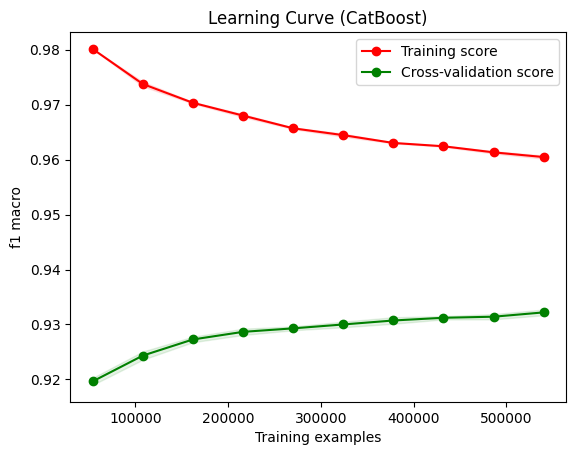

In [2]:
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
import numpy as np

train_sizes, train_scores, validation_scores = learning_curve(
    estimator = xgboost_pipeline,
    X = X_train,
    y = y_train,
    train_sizes = np.linspace(0.1, 1.0, 10),
    cv = 5,
    scoring = 'f1_macro'
)

#recuperation des moyennes et des écarts types(facultatif) à chaque cv
train_scores_mean = train_scores.mean(axis = 1)
train_scores_std = train_scores.std(axis = 1)
validation_scores_mean = validation_scores.mean(axis = 1)
validation_scores_std = validation_scores.std(axis = 1)


plt.figure()
plt.title("Learning Curve (CatBoost)")
plt.xlabel("Training examples")
plt.ylabel("f1 macro")
#plt.gca().invert_yaxis() #inverser y car métrique de perte

# afficher les points
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, validation_scores_mean, 'o-', color="g", label="Cross-validation score")

# relier les points
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, validation_scores_mean - validation_scores_std, validation_scores_mean + validation_scores_std, alpha=0.1, color="g")


plt.legend()
plt.show()